# Encodeur-Decodeur


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Pour ce TP nous allons construire deux types de réseaux encodeurs-décodeurs pour les données MNIST.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

On normalise les niveaux de gris entre 0 et 1:

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

On affiche un échantillon d'images:

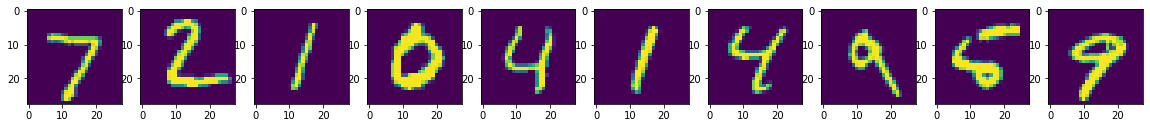

In [4]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])

In [5]:
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


> Transformer chaque observation en un vecteur de taille 784.

In [6]:
x_train =  np.ndarray.flatten(x_train).reshape(60000,784)
x_test =  np.ndarray.flatten(x_test).reshape(10000,784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#  Encodeur-decodeur simple 

Nous allons constuire un encodeur décodeur très simple: 
- une couche dense de dimension 16 avec activation relu pour l'encodage ,
- une couche de décodage avec activation sigmoid  qui reconstruit un vecteur de taille 784 à valeur dans $[0,1]$.

> Définir  ce réseau de façon séquentielle avec fonction `Sequential()`, sans l'ajuster pour le moment sur les données.

In [7]:
### TO DO ###Définition du réseau
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape = (784,)))
model.add(layers.Dense(784, activation= "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


Comme on observe sur chaque pixel une quantité numérique entre $[0,1]$, il est possible d'utiliser une perte de type `binary_crossentropy`.

> Ajuster le réseau sur les données. Utiliser les données de test pour suivre le long de la trajectoire de descente de gradient l'erreur de validation.

In [8]:
### TO DO ### Ajustement du réseau 
# Compiler le modèle 
model.compile(loss="binary_crossentropy")

model.fit(
    x_train, x_train,
    batch_size = 32,
    epochs = 5
)
x_pred = model.predict(x_train)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1383
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1327
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1309
Epoch 5/5
1875/1875 [==============================] - 2s 912us/step


> Calculer le vecteur des prédictions. Pour quelques images, comparer l'image initiale avec l'image prédite en sortie du décodeur.

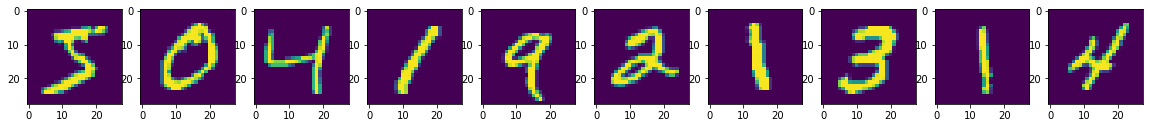

In [9]:
### TO DO ###
n = 10  
x_train1 =  np.ndarray.flatten(x_train).reshape(60000,28,28)
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_train1[i])

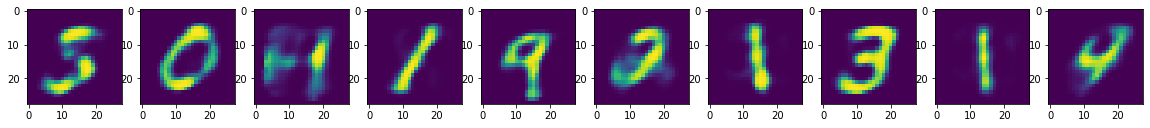

In [10]:
n = 10  
plt.figure(figsize=(20, 4))
x_pred1 =  np.ndarray.flatten(x_pred).reshape(60000,28,28)
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_pred1[i])

> Calculer la représentation de chacune des observations de x_test dans l'espace latent (i.e. en sortie de l'encodeur).

In [11]:
### TO DO ###
x_test_encoded = model.predict(x_test)
print(x_test_encoded.shape)

313/313 [==============================] - 0s 920us/step
(10000, 784)


> Appliquer une réduction de dimension linéaire aux données de test encodées à l'aide de l'algorithme [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). Vérifier que les données se regroupent en clusters cohérents avec les chiffres qu'ils représentent.

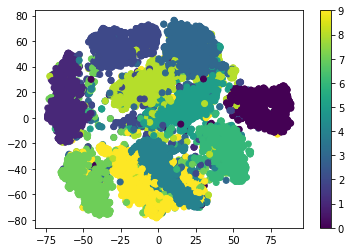

In [12]:
### TO DO ###
from sklearn.manifold import TSNE

# Instantiating the t-SNE model
tsne = TSNE(n_components=2)

# Fitting the t-SNE model to the latent representations
latent_representations_2d = tsne.fit_transform(x_test_encoded)

# Plotting the t-SNE results
import matplotlib.pyplot as plt
plt.scatter(latent_representations_2d[:, 0], latent_representations_2d[:, 1], c=y_test)
plt.colorbar()
plt.show()

Effectivement, les données se regroupent en clusters cohérents avec les chiffres qu'ils représentent.

## Utilisation de l'API Model de keras

Pour construire l'auto-encodeur précédent, nous avons utilisé le modèle séquentiel [Sequential()](https://keras.io/getting-started/sequential-model-guide/). Nous allons maintenant construire le réseau en l'utilisant la [functional  API de keras pour construire des modèles](https://keras.io/guides/functional_api/) et qui permet de manipuler des architectures plus complexes. 

> Commencez par lire le paragraphe "First example: a densely-connected network" 
de cette [page](https://faroit.com/keras-docs/2.0.1/getting-started/functional-api-guide/) et complétez ensuite le code ci-dessous.

In [13]:
from keras.layers import Input 
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten

dim_encod = 16  

input_image = Input(shape=(784,))
 
encodeur_layer = Dense(dim_encod , activation='relu')(input_image)
 
decodeur_layer = Dense(784, activation='sigmoid')(encodeur_layer)

mon_autoencodeur = Model(inputs = input_image, outputs = decodeur_layer)


> Vérifier que ce réseau a la même architecture que précédemment.


In [14]:
### TO DO ###
mon_autoencodeur.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 16)                12560     
                                                                 
 dense_3 (Dense)             (None, 784)               13328     
                                                                 
Total params: 25,888
Trainable params: 25,888
Non-trainable params: 0
_________________________________________________________________


Effectivement, ce réseau a la même architecture que précédemment.

> Ajuster ce réseau sur les données.

In [19]:
### TO DO ###

mon_autoencodeur.compile(loss='binary_crossentropy')

mon_autoencodeur.fit(
    x_train, x_train,
    batch_size = 32,
    epochs = 5
)
x_pred = model.predict(x_test)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1298
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1296
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1294
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1292
Epoch 5/5
313/313 [==============================] - 0s 900us/step


> A l'aide de la fonction `Model`, définir un réseau pour la partie encodeur, et utiliser pour calculer l'encodage des données de test.

In [20]:
### TO DO ###
mon_encodeur=Model(inputs=input_image,outputs=encodeur_layer)
y = mon_encodeur.predict(x_test)
print(y)

313/313 [==============================] - 0s 840us/step
[[ 8.670658    3.6983237   1.4228531  ... 25.737974   11.996938
   2.7380786 ]
 [ 0.          4.1608105  11.344048   ...  9.358607    1.4460697
  12.321928  ]
 [ 5.1402626   1.6226506   5.363879   ...  1.895345    1.3000243
   2.4861193 ]
 ...
 [ 8.641903    1.1503742   2.7560458  ... 28.403418    9.1468725
   0.79700613]
 [ 6.0104456   0.          7.223647   ... 20.345201    5.8028736
   9.642001  ]
 [ 0.919031    3.7705379  13.745071   ... 33.39799     2.323884
   7.3776836 ]]


In [21]:
np.shape(y)

(10000, 16)

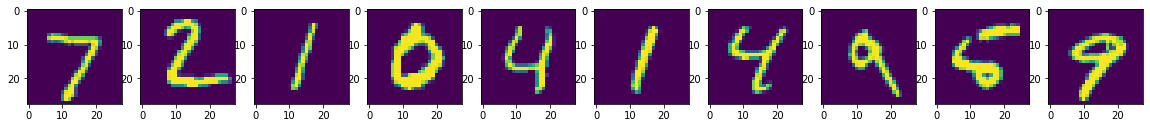

In [23]:
### TO DO ###
n = 10  
x_test2 =  np.ndarray.flatten(x_test).reshape(10000,28,28)
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test2[i])

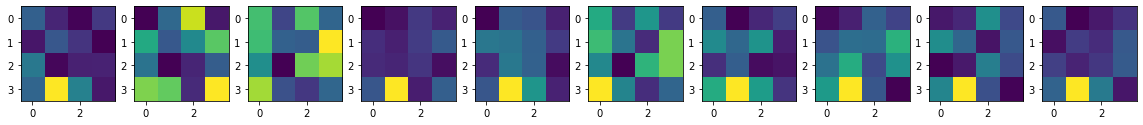

In [ ]:
n = 10  
plt.figure(figsize=(20, 4))
x_pred2 =  [y.reshape(28,28) for i in range(n)]
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_pred2[i])

# Réseau dense convolutionnel

Nous allons maintenant construire un réseau auto encodeur convolutionnel pour essayer d'améliorer l'encodage précédent (au moins visuellement). 
 



Les données en entreés doivent être de la forme d'un tenseur (28,28,1)
> Transformer les données pour les mettre au bon format.

In [27]:
### TO DO ###
x_train=np.array([im.reshape(28,28,1) for im in x_train])
x_test=np.array([im.reshape(28,28,1) for im in x_test])
x_train.shape

(60000, 28, 28, 1)

 > Compléter la construction ci-dessous pour la partie encodeur du réseau.

In [28]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_image = Input(shape=(28,28,1))   

layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_image)
layer2 = MaxPooling2D((2, 2), padding='same')(layer1)
layer3 = Conv2D(8, (3, 3), activation='relu', padding='same')(layer2)
layer4= MaxPooling2D((2, 2), padding='same')(layer3)
layer5 = Conv2D(8, (3, 3), activation='relu', padding='same')(layer4)

mon_encodeur_layer = MaxPooling2D((2, 2), padding='same')(layer5)

> Quelle la dimension de l'encodage ?

(4, 4, 8) i.e. 128-dimensional

> Compléter la construction ci-dessous pour le decodeur et l'encodeur-décodeur complet. 

In [29]:
layer6 = Conv2D(8, (3, 3), activation='relu', padding='same')(mon_encodeur_layer)
layer7 = UpSampling2D((2, 2))(layer6)
layer8 = Conv2D(8, (3, 3), activation='relu', padding='same')(layer7)
layer9 = UpSampling2D((2, 2))(layer8)
layer10 = Conv2D(16, (3, 3), activation='relu')(layer9)
layer11 = UpSampling2D((2, 2))(layer10)

mon_decodeur_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(layer11)

mon_autoencodeur_conv = Model(inputs = input_image, outputs = mon_decodeur_layer)


Afficher l'architecture de votre réseau.

In [30]:
### TO DO ###
mon_autoencodeur_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

> Ajuster ce modèle sur les données et comparer visuellement la qualité de l'encodage avec l'encodeur simple précédent.

In [31]:
### TO DO ###
mon_autoencodeur_conv.compile(loss='binary_crossentropy')
mon_autoencodeur_conv.fit(x_train,x_train,batch_size=32,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1672
Epoch 2/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1271
Epoch 3/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1172
Epoch 4/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1120
Epoch 5/5
 218/1875 [==>...........................] - ETA: 32s - loss: 0.1108

KeyboardInterrupt: 

In [109]:
x_pred2 = mon_autoencodeur_conv.predict(x_test)

313/313 [==============================] - 3s 10ms/step


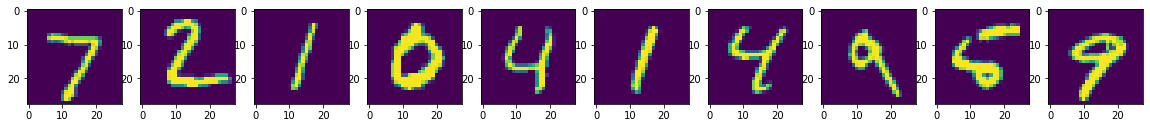

In [112]:
### TO DO ###
n = 10  
x_test2 =  [x_test[i].reshape(28,28) for i in range(n)]
plt.figure(figsize=(20, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_test2[i])

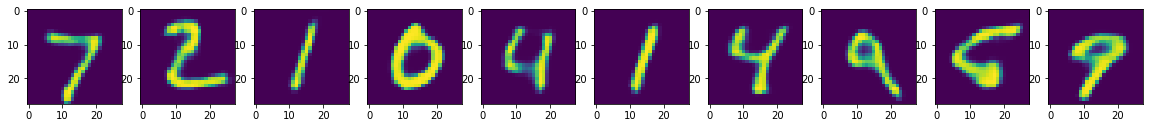

In [113]:
n = 10  
plt.figure(figsize=(20, 4))
x_pred3 =  [x_pred2[i].reshape(28,28) for i in range(n)]
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_pred3[i])